# Raspberry Pi Mouse sensor receiver

[raspimouse_http_controller](https://github.com/Tiryoh/raspimouse_http_controller)と組み合わせて使用するラズパイマウスのセンサ値受信用Jupyter Notebookです。

注がある場合を除き、本ページに掲載されているコードはMITライセンスに、文章はクリエイティブ・コモンズ・ライセンスに基づいて公開します。
<a rel="license" href="http://creativecommons.org/licenses/by/4.0/"><img alt="クリエイティブ・コモンズ・ライセンス" style="border-width:0" src="https://i.creativecommons.org/l/by/4.0/88x31.png" /></a>

## Requirements

Python 3を必要とします。

# step1
Pythonのモジュールをインポートします。
Jupyter Notebookでの描画に必要なモジュールと、ラズパイマウスとの通信に必要なモジュールと分かれています。

In [1]:
# 数値計算及び描画に必要なモジュール
import numpy as np
import math
from  matplotlib import pyplot as plt

# 通信用
import urllib.request
import time
import argparse
import json
import threading

# step2

受信用のクラス(Receiver)を作成します。ラズパイマウスとTCP通信を行います。

In [2]:
class Receiver(object):
    def __init__(self, ip, port):
        print("init")
        self.url = "http://{}:{}".format(ip, port)
        print ("connecting to " + self.url)

    def get_sensor_val(self):
        start = time.time()
        request = urllib.request.Request(self.url)
        response = urllib.request.urlopen(request)
        sensor_dict = json.loads(response.read().decode('utf-8'))
        return sensor_dict

# step3

ラズパイマウスと接続を確立します。
引数にはIPアドレスと使用するTCPポートを指定します。

In [3]:
# r = Receiver("192.168.64.3", 5000)
r = Receiver("192.168.22.137", 5000)

init
connecting to http://192.168.22.137:5000


# step4

試しにラズパイマウスからセンサの値を受信し、`print` してみます。

In [4]:
history = []
hoge = r.get_sensor_val()
history.append(hoge)
print(hoge)
print(history)

{'switch': {'2': 0, '1': 0, '0': 0}, 'lightsensor': {'2': 61, '1': 203, '0': 8, '3': 28}}
[{'switch': {'2': 0, '1': 0, '0': 0}, 'lightsensor': {'2': 61, '1': 203, '0': 8, '3': 28}}]


# step5

今度はラズパイマウスからセンサの値を連続で受信し、最後に `print` してみます。

In [7]:
for i in range(10):
    hoge = r.get_sensor_val()
    history.append(hoge)
    time.sleep(0.1)

print(history)

[{'switch': {'2': 0, '1': 0, '0': 0}, 'lightsensor': {'2': 61, '1': 203, '0': 8, '3': 28}}, {'switch': {'2': 0, '1': 0, '0': 0}, 'lightsensor': {'2': 58, '1': 517, '0': 20, '3': 37}}, {'switch': {'2': 0, '1': 0, '0': 0}, 'lightsensor': {'2': 61, '1': 482, '0': 19, '3': 26}}, {'switch': {'2': 0, '1': 0, '0': 0}, 'lightsensor': {'2': 58, '1': 465, '0': 18, '3': 34}}, {'switch': {'2': 0, '1': 0, '0': 0}, 'lightsensor': {'2': 59, '1': 525, '0': 20, '3': 29}}, {'switch': {'2': 0, '1': 0, '0': 0}, 'lightsensor': {'2': 54, '1': 176, '0': 430, '3': 28}}, {'switch': {'2': 0, '1': 0, '0': 0}, 'lightsensor': {'2': 55, '1': 274, '0': 14, '3': 69}}, {'switch': {'2': 0, '1': 0, '0': 0}, 'lightsensor': {'2': 61, '1': 275, '0': 6, '3': 287}}, {'switch': {'2': 0, '1': 0, '0': 0}, 'lightsensor': {'2': 65, '1': 290, '0': 9, '3': 159}}, {'switch': {'2': 0, '1': 0, '0': 0}, 'lightsensor': {'2': 67, '1': 281, '0': 9, '3': 212}}, {'switch': {'2': 0, '1': 0, '0': 0}, 'lightsensor': {'2': 59, '1': 263, '0': 10

# step6

連続して受信したデータを元にグラフを描画してみます。

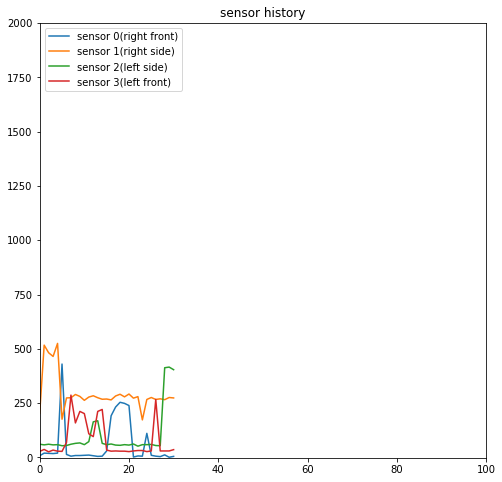

In [8]:
# タイトル付き新規ウィンドウ、座標軸を用意
fig = plt.figure(figsize=(8, 8))
plt.title("sensor history")
world = fig.add_subplot(1,1,1)
world.set_xlim(0,100)
world.set_ylim(-1.5,2000)


x_arr = np.array([])
y1_arr = np.array([])
y2_arr = np.array([])
y3_arr = np.array([])
y0_arr = np.array([])

for i in range(len(history)):
    x_arr = np.append(x_arr, i)
    y0_arr = np.append(y0_arr, history[i]["lightsensor"]["0"])
    y1_arr = np.append(y1_arr, history[i]["lightsensor"]["1"])
    y2_arr = np.append(y2_arr, history[i]["lightsensor"]["2"])
    y3_arr = np.append(y3_arr, history[i]["lightsensor"]["3"])

plt.plot(x_arr, y0_arr, label = "sensor 0(right front)")
plt.plot(x_arr, y1_arr, label = "sensor 1(right side)")
plt.plot(x_arr, y2_arr, label = "sensor 2(left side)")
plt.plot(x_arr, y3_arr, label = "sensor 3(left front)")

# 左上に凡例を追加
world.legend(loc='upper left')

# 現在の状態を確認
plt.show()